# Multiple Linear Regression

In [1]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Reading Data
data = pd.read_csv('Advertising.csv')
print(data.shape)
data = (data - data.mean())/data.std()
data.head()

(200, 5)


,Unnamed: 0,TV,radio,newspaper,sales
0,-1.719098,0.967425,0.979066,1.774493,1.548168
1,-1.701821,-1.194379,1.080097,0.667903,-0.694304
2,-1.684543,-1.512360,1.524637,1.779084,-0.905135
3,-1.667266,0.051919,1.214806,1.283185,0.858177
4,-1.649989,0.393196,-0.839507,1.278593,-0.215143


In [3]:
def cost_function(features, targets, weights):
    N = len(targets)
    J = np.sum((features.dot(weights) - targets) ** 2)/(2 * N)
    return J

In [4]:
def update_weights(X, target, weights, alpha, epochs):
    
    n = len(X)
    for epoch in range(epochs) :
        hypothesis = X.dot(weights)
        loss = hypothesis - target
        gradient = X.T.dot(loss) / n
        weights = weights - alpha * gradient
        cost_function(X, target, weights)

    return weights

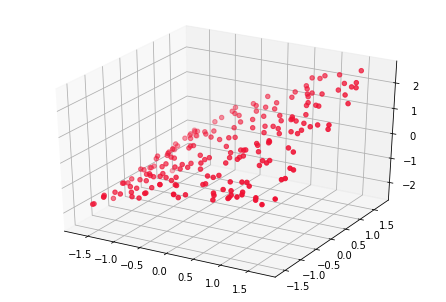

[ 2.77577961e-16  7.53027385e-01  5.36047181e-01 -3.88596880e-03]


In [5]:
alpha = 0.001
epochs = 10000

weights = np.array([0, 0, 0, 0])

x1 = data['TV'].values
x2 = data['radio'].values
x3 = data['newspaper'].values

x0 = np.ones(len(x1))
X = np.array([x0, x1, x2, x3]).T

Y = data['sales'].values

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x1, x2, Y, color='#ef1234')
plt.show()

weights = update_weights(X, Y, weights, alpha, epochs)
print(weights)

In [6]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

Y_pred = X.dot(weights)

print(rmse(Y, Y_pred))
print(r2_score(Y, Y_pred))

0.31980566720910464
0.897210387156723
